# # Este código prepara una CNN para entrenar un modelo usando datos locales

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import ModelCheckpoint
import os
print(tf.__version__)

2.4.1


In [2]:
#Definición de los directorios del dataset
base_dir = '../petsDataset'

train_dir =      os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir =       os.path.join(base_dir, 'test')

# Directorio con las imagenes de training 
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
train_parrots_dir = os.path.join(train_dir, 'parrots')

# Directorio con las imagenes de validation
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
validation_parrots_dir = os.path.join(validation_dir, 'parrots')

# Directorio con las imagenes de test
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')
test_parrots_dir = os.path.join(test_dir, 'parrots')

#print(os.path.normcase(train_cats_dir))
#print(validation_cats_dir)
#print(test_cats_dir)

In [3]:
#Confección de la lista de imagenes
train_cat_fnames = os.listdir(train_cats_dir )
print(train_cat_fnames[:5])

train_dog_fnames = os.listdir( train_dogs_dir )
print(train_dog_fnames[:5])

train_parrot_fnames = os.listdir( train_parrots_dir )
print(train_parrot_fnames[:5])

validation_cat_fnames = os.listdir( validation_cats_dir )
print(validation_cat_fnames[:5])

validation_dog_fnames = os.listdir( validation_dogs_dir )
print(validation_dog_fnames[:5])

validation_parrot_fnames = os.listdir( validation_parrots_dir )
print(validation_parrot_fnames[:5])

test_cat_fnames = os.listdir( test_cats_dir )
print(test_cat_fnames[:5])

test_dog_fnames = os.listdir( test_dogs_dir )
print(test_dog_fnames[:5])

test_parrot_fnames = os.listdir( test_parrots_dir )
print(test_parrot_fnames[:5])

['n02121620_1533.JPEG', 'cat.661.jpg', 'cat.215.jpg', 'cat.543.jpg', 'n02121620_3452.JPEG']
['dog.761.jpg', 'dog.961.jpg', 'dog.187.jpg', 'dog.473.jpg', 'dog.775.jpg']
['00001301.jpg', '00000476.jpg', '00002218.jpg', '00002229.jpg', '00000432.jpg']
['cat.1213.jpg', 'cat.1229.jpg', 'cat.1188.jpg', 'cat.1445.jpg', 'n02121620_19341.JPEG']
['dog.1074.jpg', 'dog.1487.jpg', 'dog.1280.jpg', 'dog.1305.jpg', 'dog.1163.jpg']
['00001324.jpg', '00003373.jpg', '00001467.jpg', '00000370.jpg', '00003194.jpg']
['cat.1930.jpg', 'cat.1819.jpg', 'cat.1784.jpg', 'n02121620_4584.JPEG', 'cat.1759.jpg']
['dog.1954.jpg', 'dog.1873.jpg', 'dog.1683.jpg', 'dog.1703.jpg', 'dog.1679.jpg']
['00000808.jpg', '00002454.jpg', '00000869.jpg', '00000026.jpg', '00000874.jpg']


In [4]:
#Imprimir cantidad de imagenes para cada sección
print('total training cat images :', len(os.listdir(train_cats_dir ) ))
print('total training dog images :', len(os.listdir(train_dogs_dir ) ))
print('total training parrot images :', len(os.listdir(train_parrots_dir ) ))




total training cat images : 1620
total training dog images : 1620
total training parrot images : 1620


In [5]:
print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))
print('total validation parrot images :', len(os.listdir( validation_parrots_dir ) ))



total validation cat images : 540
total validation dog images : 540
total validation parrot images : 540


In [6]:
print('total test cat images :', len(os.listdir( test_cats_dir ) ))
print('total test dog images :', len(os.listdir( test_dogs_dir ) ))
print('total test parrot images :', len(os.listdir( test_parrots_dir ) ))

total test cat images : 540
total test dog images : 540
total test parrot images : 540


Figura 1


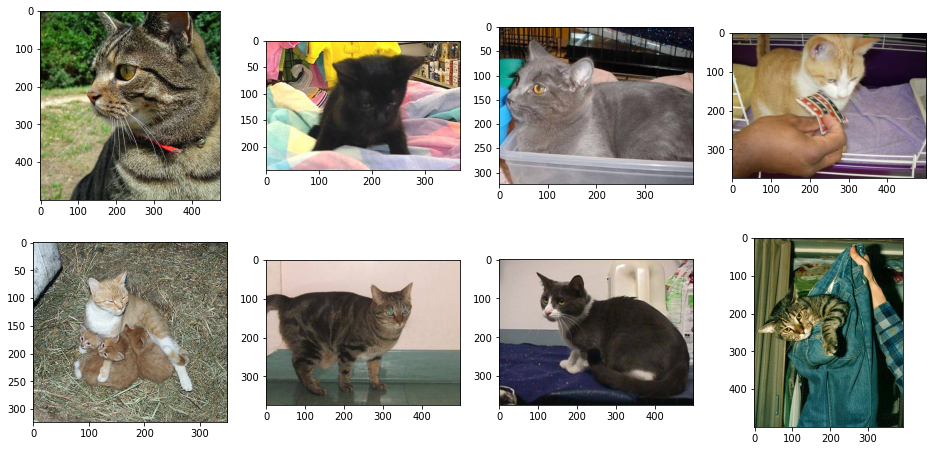

Figura 2


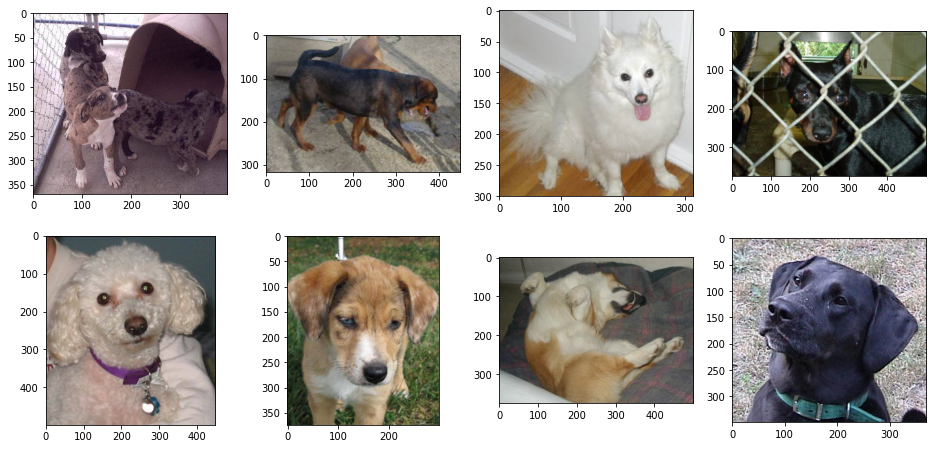

Figura 3


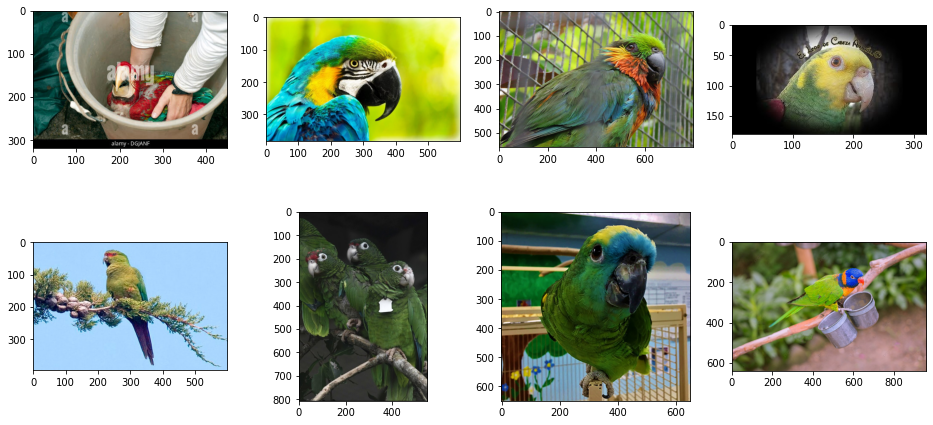

Figura 4


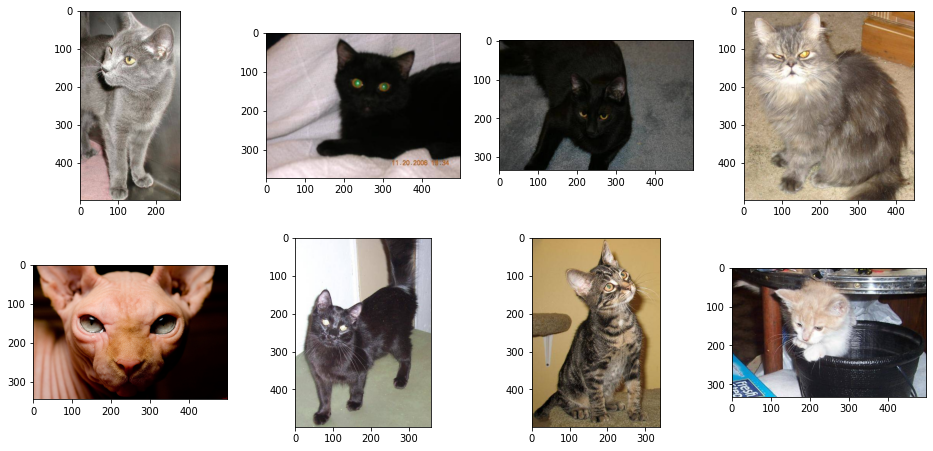

Figura 5


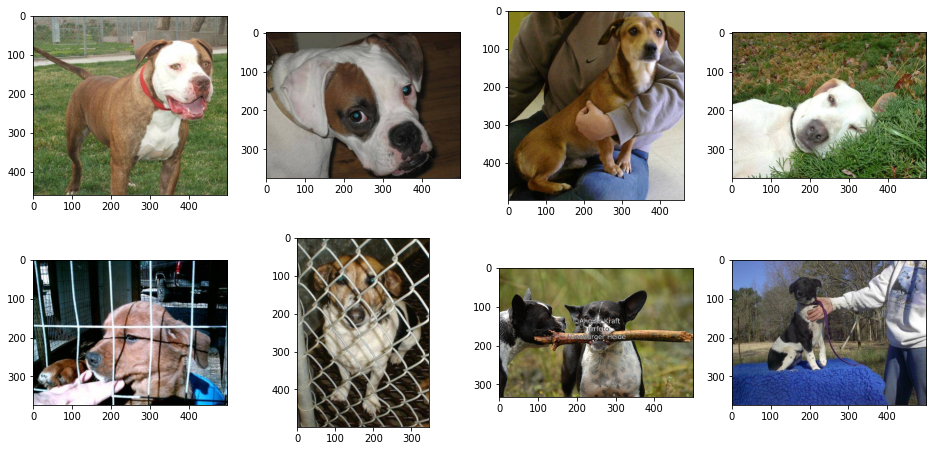

Figura 6


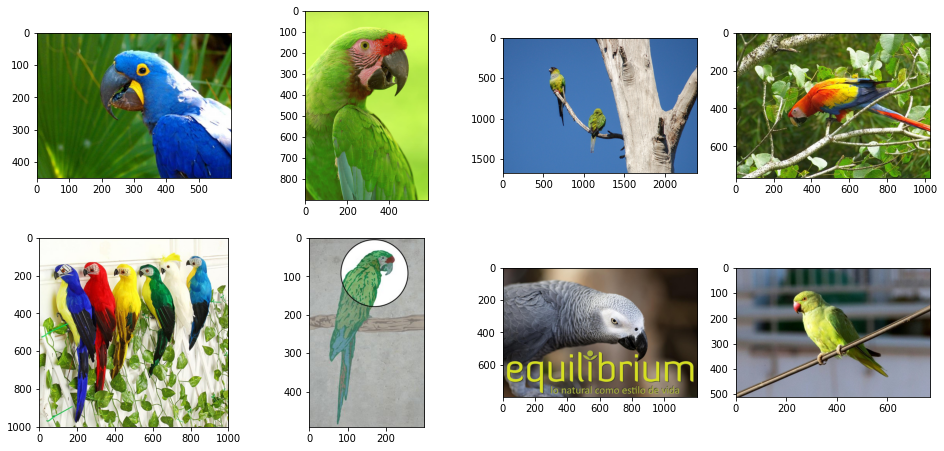

Figura 7


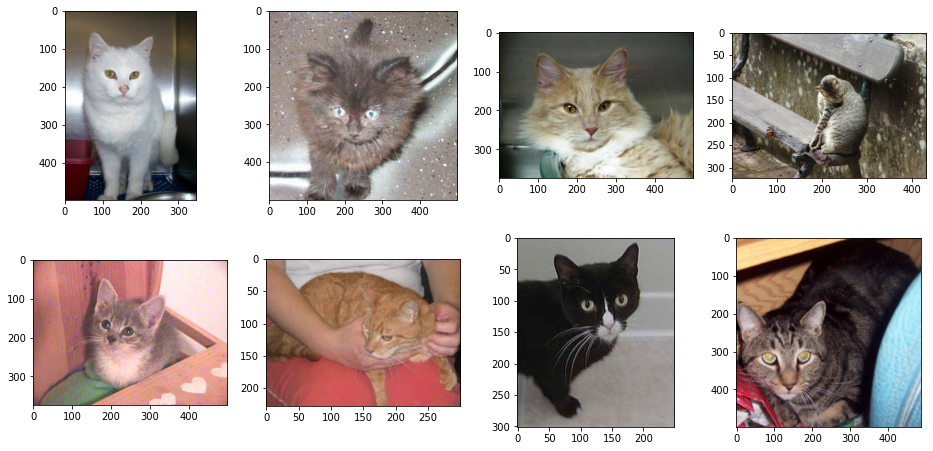

Figura 8


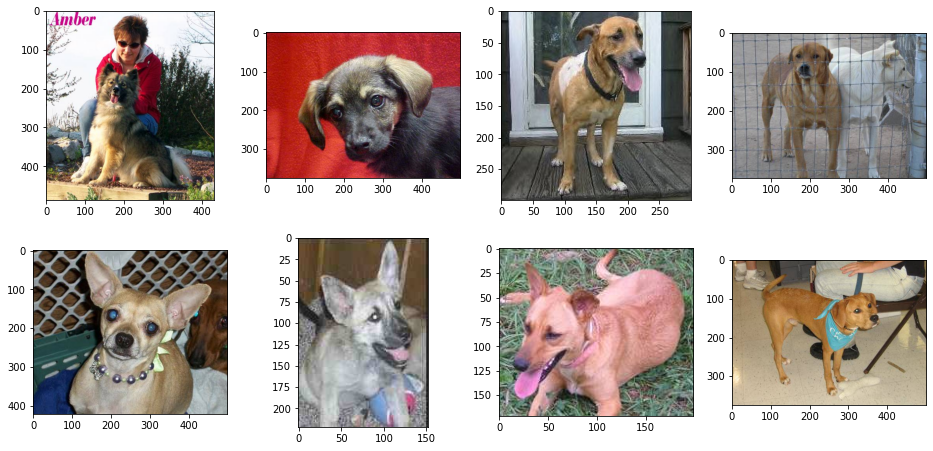

Figura 9


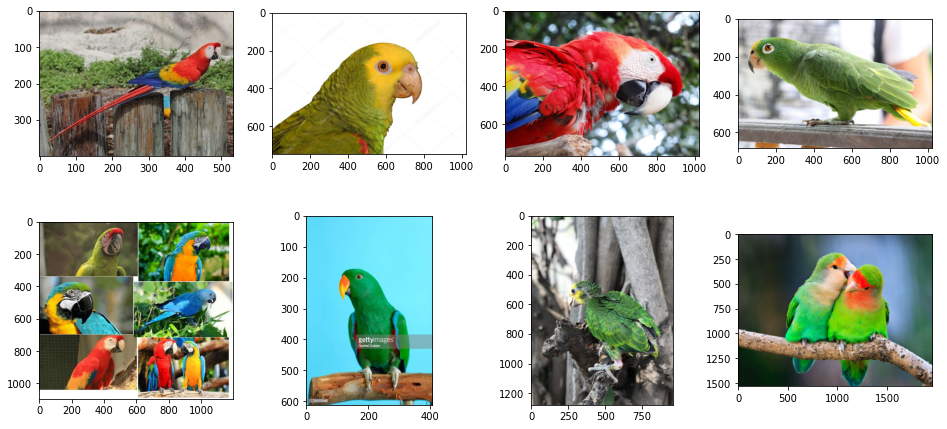

In [7]:
#Función para visualizar las imágenes
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

def print_pictures(dir, fnames):
  # presentaremos images en una configuración de 4x4
  nrows = 4
  ncols = 4

  pic_index = 0 # Índice para iterar sobre las imagenes

  fig = plt.gcf()
  fig.set_size_inches(ncols*4, nrows*4)

  pic_index+=8

  next_pix = [os.path.join(dir, fname) 
                for fname in fnames[ pic_index-8:pic_index] 
               ]

  for i, img_path in enumerate(next_pix):
    sp = plt.subplot(nrows, ncols, i + 1)
    img = mpimg.imread(img_path)
    plt.imshow(img)

  plt.show()

  
print("Figura 1")
print_pictures(train_cats_dir, train_cat_fnames)
print("Figura 2")
print_pictures(train_dogs_dir, train_dog_fnames)
print("Figura 3")
print_pictures(train_parrots_dir, train_parrot_fnames)

print("Figura 4")
print_pictures(validation_cats_dir, validation_cat_fnames)
print("Figura 5")
print_pictures(validation_dogs_dir, validation_dog_fnames)
print("Figura 6")
print_pictures(validation_parrots_dir, validation_parrot_fnames)

print("Figura 7")
print_pictures(test_cats_dir, test_cat_fnames)
print("Figura 8")
print_pictures(test_dogs_dir, test_dog_fnames)
print("Figura 9")
print_pictures(test_parrots_dir, test_parrot_fnames)

In [12]:
# In[9]:



In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [14]:
# In[11]:


In [15]:
# In[12]:


Found 4860 images belonging to 3 classes.
Found 1620 images belonging to 3 classes.
Found 1620 images belonging to 3 classes.


In [16]:
batch_size = 10
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

print (steps_per_epoch)
print (validation_steps)

243
81


In [17]:
# In[14]:


Epoch 1/180


/usr/lib/python3/dist-packages/PIL/TiffImagePlugin.py:756: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


243/243 - 28s - loss: 0.8291 - acc: 0.5698 - val_loss: 0.6578 - val_acc: 0.6512
Epoch 2/180
243/243 - 17s - loss: 0.6628 - acc: 0.6531 - val_loss: 0.6144 - val_acc: 0.6704
Epoch 3/180
243/243 - 17s - loss: 0.6154 - acc: 0.6977 - val_loss: 0.5578 - val_acc: 0.6988
Epoch 4/180
243/243 - 17s - loss: 0.5812 - acc: 0.7313 - val_loss: 0.5319 - val_acc: 0.7296
Epoch 5/180
243/243 - 17s - loss: 0.5441 - acc: 0.7453 - val_loss: 0.5365 - val_acc: 0.7414
Epoch 6/180
243/243 - 17s - loss: 0.5178 - acc: 0.7644 - val_loss: 0.4921 - val_acc: 0.7667
Epoch 7/180
243/243 - 17s - loss: 0.5012 - acc: 0.7724 - val_loss: 0.4780 - val_acc: 0.7691
Epoch 8/180
243/243 - 17s - loss: 0.4804 - acc: 0.7813 - val_loss: 0.4815 - val_acc: 0.7722
Epoch 9/180
243/243 - 17s - loss: 0.4635 - acc: 0.7949 - val_loss: 0.5078 - val_acc: 0.7506
Epoch 10/180
243/243 - 17s - loss: 0.4324 - acc: 0.8093 - val_loss: 0.4784 - val_acc: 0.7753
Epoch 11/180
243/243 - 17s - loss: 0.4179 - acc: 0.8148 - val_loss: 0.4610 - val_acc: 0.776

Epoch 90/180
243/243 - 18s - loss: 0.0071 - acc: 0.9971 - val_loss: 1.2642 - val_acc: 0.7901
Epoch 91/180
243/243 - 17s - loss: 0.0132 - acc: 0.9955 - val_loss: 1.1653 - val_acc: 0.7994
Epoch 92/180
243/243 - 17s - loss: 0.0038 - acc: 0.9990 - val_loss: 1.1414 - val_acc: 0.8000
Epoch 93/180
243/243 - 17s - loss: 0.0017 - acc: 0.9996 - val_loss: 1.2694 - val_acc: 0.7957
Epoch 94/180
243/243 - 17s - loss: 0.0103 - acc: 0.9969 - val_loss: 1.1908 - val_acc: 0.7901
Epoch 95/180
243/243 - 17s - loss: 0.0043 - acc: 0.9990 - val_loss: 1.2791 - val_acc: 0.7926
Epoch 96/180
243/243 - 17s - loss: 0.0105 - acc: 0.9965 - val_loss: 1.1302 - val_acc: 0.7907
Epoch 97/180
243/243 - 17s - loss: 0.0165 - acc: 0.9949 - val_loss: 1.0853 - val_acc: 0.7852
Epoch 98/180
243/243 - 17s - loss: 0.0101 - acc: 0.9965 - val_loss: 1.1146 - val_acc: 0.7938
Epoch 99/180
243/243 - 18s - loss: 0.0105 - acc: 0.9969 - val_loss: 1.0826 - val_acc: 0.7951
Epoch 100/180
243/243 - 18s - loss: 0.0068 - acc: 0.9986 - val_loss: 1

Epoch 177/180
243/243 - 17s - loss: 0.0013 - acc: 0.9998 - val_loss: 1.2587 - val_acc: 0.8025
Epoch 178/180
243/243 - 17s - loss: 5.8623e-04 - acc: 1.0000 - val_loss: 1.3101 - val_acc: 0.8031
Epoch 179/180
243/243 - 17s - loss: 2.3655e-04 - acc: 1.0000 - val_loss: 1.3076 - val_acc: 0.8031
Epoch 180/180
243/243 - 17s - loss: 1.0650e-04 - acc: 1.0000 - val_loss: 1.3552 - val_acc: 0.8056


In [18]:
# In[15]:
import json
print(train_generator.class_indices)

a_file = open("pets_indices.json", "w")
a_file = json.dump(train_generator.class_indices, a_file)

#print(model.class_indices)
history_dict = history.history
print(history_dict.keys())

{'cats': 0, 'dogs': 1, 'parrots': 2}
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


<Figure size 432x288 with 0 Axes>

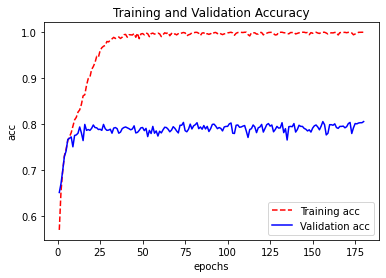

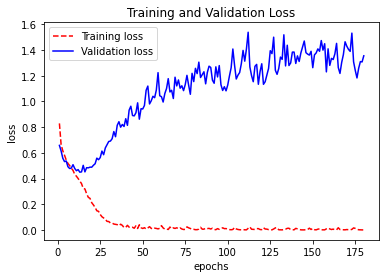

<Figure size 432x288 with 0 Axes>

In [19]:
# In[16]:


In [20]:
# In[17]:


35/81 [===========>..................] - ETA: 2s - loss: 1.4604 - acc: 0.7929

/usr/lib/python3/dist-packages/PIL/TiffImagePlugin.py:756: UserWarning: Truncated File Read
  warnings.warn(str(msg))


81/81 [==============================] - 5s 57ms/step - loss: 1.4231 - acc: 0.7994
Test Accuracy: 0.7993826866149902
